# Group Members:
- Yang JiAn: A0233196A
- Yuen Jia Jie: A0233224U
- Huang Renzhou: A0239579H
- Diao Zhuoxuan: A0239446W

# Introduction

This project attempts to predict credit card default payment and non-default payment next month using various prediction models.
This project is taking perspective from the credit risk management entity, whose goal is to set higher bars to default customers to reduce risk of making loss and seek more clients with good credits. Hence, it is crucial to make correct classification and prediction on default and non-default payments.

## Import Packages

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import ks_2samp
import mlxtend
from mlxtend.evaluate import bias_variance_decomp
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


## Read the files

``` 
data <- read.table("card.csv",sep=",",skip=2,header=FALSE)
header <- scan("card.csv",sep=",",nlines=2,what=character())
header <- header[26:50]

set.seed(1234)
n = length(data$V1)
index <- 1:nrow(data)
testindex <- sample(index, trunc(n)/4)
test.data <- data[testindex,]
train.data <- data[-testindex,]

colnames(test.data) <- header
colnames(train.data) <- header
write.csv(test.data, "test_data.csv")
write.csv(train.data, "train_data.csv")
```

The set seed function provided in question given in R, but we are using Python for our project. Thus we exported the train and test set from R and imported it to Python. In this way, it maintains consistency of the training and testing set.

In [185]:
df = pd.read_csv('card.csv', header = 1)
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


First look at some of the data to get a rough sensing of what data types and range of data we are working with.

In [186]:
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

# Exploratory Data Analysis
In this section, we perform an initial investigation of data to discover patterns, and spot anomalies, inconsistencies and missing values with the aid of summary statistics and graphical visualisations.

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Checking for null values

In [188]:
# checking for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

- We see that all 25 columns have 30,000 rows of data. The data is clean and does not have any missing values.

## Renaming header names for consistency
- We see that the repayment status is indicated in columns PAY_0, PAY_2, ... with no PAY_1 column. We rename PAY_0 to PAY_1 to make it consistent with BILL_AMT and PAY_AMT
- Column name 'default.payment.next.month' is too long and the use of so many '.' may interefre with some methods. We rename it to 'DEFAULT' for convenience.


In [189]:
df.rename(columns = {'default payment next month':'DEFAULT', 'PAY_0':'PAY_1'}, inplace = True)
train_df.rename(columns = {'default payment next month':'DEFAULT', 'PAY_0':'PAY_1'}, inplace = True)
test_df.rename(columns = {'default payment next month':'DEFAULT', 'PAY_0':'PAY_1'}, inplace = True)

## Checking for unique values of the categorical variables

In [190]:
print('SEX ' + str(sorted(df['SEX'].unique())))
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))
print()
print('PAY_1 ' + str(sorted(df['PAY_1'].unique())))
print('PAY_2 ' + str(sorted(df['PAY_2'].unique())))
print('PAY_3 ' + str(sorted(df['PAY_3'].unique())))
print('PAY_4 ' + str(sorted(df['PAY_4'].unique())))
print('PAY_5 ' + str(sorted(df['PAY_5'].unique())))
print('PAY_6 ' + str(sorted(df['PAY_6'].unique())))
print()
print('PAY_AMT1 ' + str(sorted(df['PAY_6'].unique())))
print('PAY_AMT2 ' + str(sorted(df['PAY_6'].unique())))
print('PAY_AMT3 ' + str(sorted(df['PAY_6'].unique())))
print('PAY_AMT4 ' + str(sorted(df['PAY_6'].unique())))
print('PAY_AMT5 ' + str(sorted(df['PAY_6'].unique())))
print('PAY_AMT6 ' + str(sorted(df['PAY_6'].unique())))
print()
print('BILL_AMT1 ' + str(sorted(df['PAY_6'].unique())))
print('BILL_AMT2 ' + str(sorted(df['PAY_6'].unique())))
print('BILL_AMT3 ' + str(sorted(df['PAY_6'].unique())))
print('BILL_AMT4 ' + str(sorted(df['PAY_6'].unique())))
print('BILL_AMT5 ' + str(sorted(df['PAY_6'].unique())))
print('BILL_AMT6 ' + str(sorted(df['PAY_6'].unique())))
print()
print('DEFAULT ' + str(sorted(df['DEFAULT'].unique())))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]

PAY_1 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]

PAY_AMT1 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_AMT2 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_AMT3 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_AMT4 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_AMT5 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_AMT6 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]

BILL_AMT1 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
BILL_AMT2 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
BILL_AMT3 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
BILL_AMT4 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
BILL_AMT5 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
BILL_AMT6 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]

DEFAULT [0, 1]


- The value in EDUCATION is not defined completely. We will replace the values 0, 5 and 6 with 4 (others) to make it consistent. 
- Similarly, 0 is not defined in MARRIED. Thus, we will replace the value 0 with 3 (others).
- Another finding is that PAY_5 and PAY_6 does not have the factor '1'. Upon investigation, we have come to a conclusion that it is okay because it may just be coincidental that nobody delayed payment for exactly one month in those times.
- Furthermore, for the repayment status, 0, -1 and -2 should be subsumed into just one variable which means for duly payment.

## Handling inconsistencies of variables

In [191]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4
fill1 = (train_df.EDUCATION == 0) | (train_df.EDUCATION == 5) | (train_df.EDUCATION == 6)
train_df.loc[fill1, 'EDUCATION'] = 4
fill2 = (test_df.EDUCATION == 0) | (test_df.EDUCATION == 5) | (test_df.EDUCATION == 6)
test_df.loc[fill2, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


In [192]:
fill = (df.MARRIAGE == 0) 
df.loc[fill, 'MARRIAGE'] = 3
fill1 = (train_df.MARRIAGE == 0) 
train_df.loc[fill1, 'MARRIAGE'] = 3
fill2 = (test_df.MARRIAGE == 0) 
test_df.loc[fill2, 'MARRIAGE'] = 3

print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))



MARRIAGE [1, 2, 3]


In [193]:
fill = (df.PAY_1 == -1) | (df.PAY_1 == -2) 
df.loc[fill, 'PAY_1'] = 0
fill1 = (train_df.PAY_1 == -1) | (train_df.PAY_1 == -2)
train_df.loc[fill1, 'PAY_1'] = 0
fill2 = (test_df.PAY_1 == -1) | (test_df.PAY_1 == -2)
test_df.loc[fill2, 'PAY_1'] = 0

fill = (df.PAY_2 == -1) | (df.PAY_2 == -2)
df.loc[fill, 'PAY_2'] = 0
fill1 = (train_df.PAY_2 == -1) | (train_df.PAY_2 == -2)
train_df.loc[fill1, 'PAY_2'] = 0
fill2 = (test_df.PAY_2 == -1) | (test_df.PAY_2 == -2)
test_df.loc[fill2, 'PAY_2'] = 0

fill = (df.PAY_3 == -1) | (df.PAY_3 == -2)
df.loc[fill, 'PAY_3'] = 0
fill1 = (train_df.PAY_3 == -1) | (train_df.PAY_3 == -2)
train_df.loc[fill1, 'PAY_3'] = 0
fill2 = (test_df.PAY_3 == -1) | (test_df.PAY_3 == -2)
test_df.loc[fill2, 'PAY_3'] = 0

fill = (df.PAY_4 == -1) | (df.PAY_4 == -2)
df.loc[fill, 'PAY_4'] = 0
fill1 = (train_df.PAY_4 == -1) | (train_df.PAY_4 == -2)
train_df.loc[fill1, 'PAY_4'] = 0
fill2 = (test_df.PAY_4 == -1) | (test_df.PAY_4 == -2)
test_df.loc[fill2, 'PAY_4'] = 0

fill = (df.PAY_5 == -1) | (df.PAY_5 == -2)
df.loc[fill, 'PAY_5'] = 0
fill1 = (train_df.PAY_5 == -1) | (train_df.PAY_5 == -2)
train_df.loc[fill1, 'PAY_5'] = 0
fill2 = (test_df.PAY_5 == -1) | (test_df.PAY_5 == -2)
test_df.loc[fill2, 'PAY_5'] = 0

fill = (df.PAY_6 == -1) | (df.PAY_6 == -2)
df.loc[fill, 'PAY_6'] = 0
fill1 = (train_df.PAY_6 == -1) | (train_df.PAY_6 == -2)
train_df.loc[fill1, 'PAY_6'] = 0
fill2 = (test_df.PAY_6 == -1) | (test_df.PAY_6 == -2)
test_df.loc[fill2, 'PAY_6'] = 0


print('PAY_1 ' + str(sorted(df['PAY_1'].unique())))
print('PAY_2 ' + str(sorted(df['PAY_2'].unique())))
print('PAY_3 ' + str(sorted(df['PAY_3'].unique())))
print('PAY_4 ' + str(sorted(df['PAY_4'].unique())))
print('PAY_5 ' + str(sorted(df['PAY_5'].unique())))
print('PAY_6 ' + str(sorted(df['PAY_6'].unique())))


PAY_1 [0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 [0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 [0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 [0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 [0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 [0, 2, 3, 4, 5, 6, 7, 8]


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

## Check proportion of default and non-default for given df, train and test set is same

We check that our training and test set has splitted the 2 outcomes in the target variable evenly. After calculation, we see that the proportion of default payments is around 0.22 for the main data set, training set and test set.

In [195]:
print('Percentage of defaulters in original dataset: ', round(df['DEFAULT'].value_counts()[1]/len(df) * 100,2), '%')
print('Percentage of defaulters in training dataset: ', round(train_df['DEFAULT'].value_counts()[1]/len(train_df) * 100,2), '%')
print('Percentage of df in testing dataset: ', round(test_df['DEFAULT'].value_counts()[1]/len(test_df) * 100,2), '%')

Percentage of defaulters in original dataset:  22.12 %
Percentage of defaulters in training dataset:  22.08 %
Percentage of df in testing dataset:  22.24 %


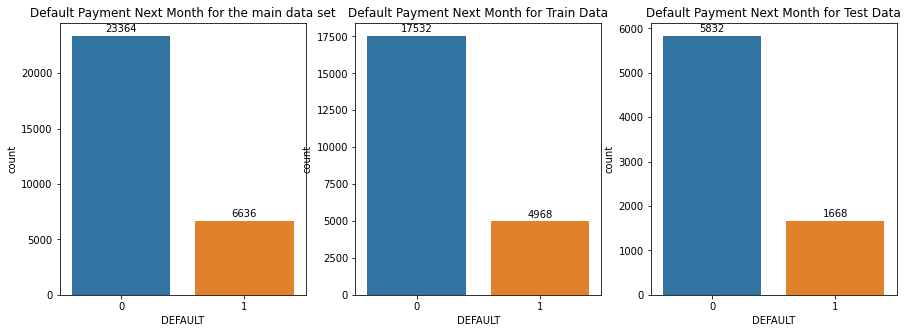

In [196]:
# Plot 3 graphs to show the distribution of defaulters in the original dataset, training dataset and testing dataset
# Plot the 3 graph side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x='DEFAULT', data=df, ax=ax1)
sns.countplot(x='DEFAULT', data=train_df, ax=ax2)
sns.countplot(x='DEFAULT', data=test_df, ax=ax3)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
ax1.set_title('Default Payment Next Month for the main data set')
ax2.set_title('Default Payment Next Month for Train Data')
ax3.set_title('Default Payment Next Month for Test Data')
plt.show()


## Plotting of graphs to see the trend of the variables, find outliers and anomalies

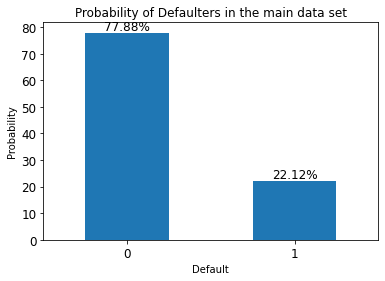

In [197]:
# Plot the probability of defaulters in the original dataset
def_prob = (df.DEFAULT.value_counts(normalize=True)*100)
# round to 2 decimal places
def_prob = def_prob.round(2)
def_prob.plot(kind='bar')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Probability of Defaulters in the main data set')
for x,y in zip([0,1],def_prob):
    # Center the text
    plt.text(x, y, str(y)+'%', ha='center', va='bottom', fontsize=12)
plt.xlabel('Default')
plt.ylabel('Probability')
plt.show()

By observation, we can conclude that the compositions of the number of default payments and non-default payments in main, train and test data are roughly the same. Percentage of default payments is around 77.9%, while the percentage of non-fault payments is around 22.1% for all three sets.

(array([0, 1, 2]), [Text(0, 0, '2'), Text(1, 0, '1'), Text(2, 0, '3')])

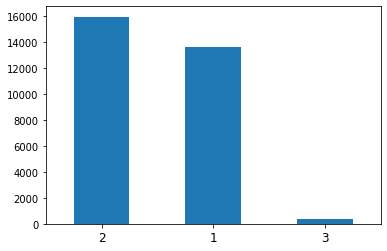

In [198]:
df.MARRIAGE.value_counts().plot(kind = 'bar')
plt.xticks(fontsize=12, rotation=0)

<AxesSubplot:>

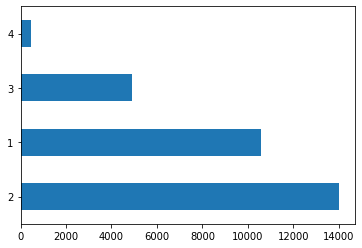

In [199]:
df.EDUCATION.value_counts().plot(kind = "barh")


In [200]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

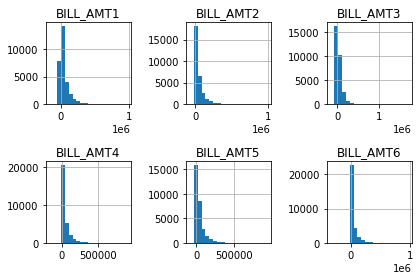

In [201]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

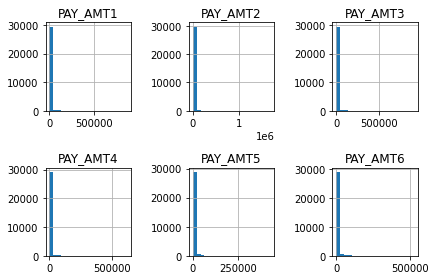

In [202]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)


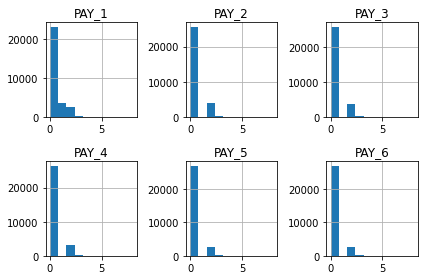

In [203]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

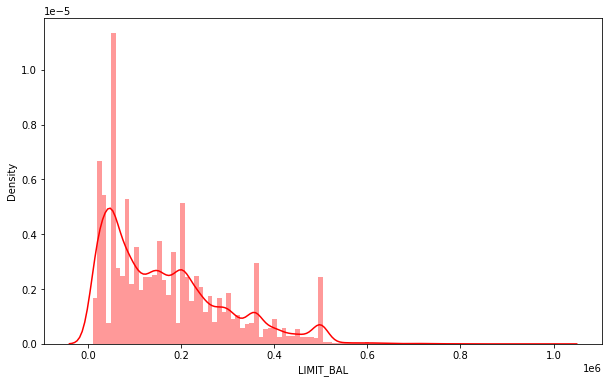

In [204]:
# plot limit balance
plt.figure(figsize=(10,6))
sns.distplot(df['LIMIT_BAL'], color='r', bins=100, hist_kws={'alpha': 0.4})


<AxesSubplot:xlabel='DEFAULT', ylabel='LIMIT_BAL'>

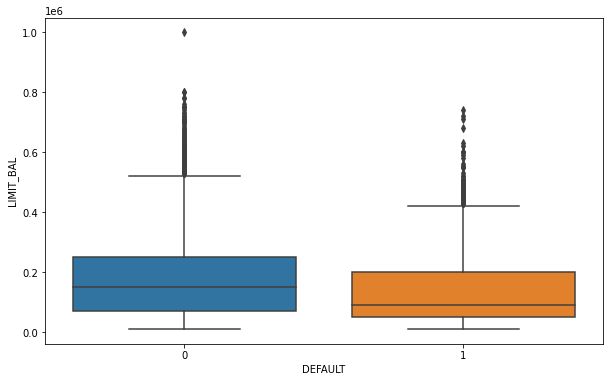

In [205]:
# plot boxplot for limit balance by default 
plt.figure(figsize=(10,6))
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=df)

- From the boxplot, we can see that the limit balance of those who will default is slightly lower than those who will not default. As a result, we gain an understanding that limit balance may play a part in predicting of default payments.

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

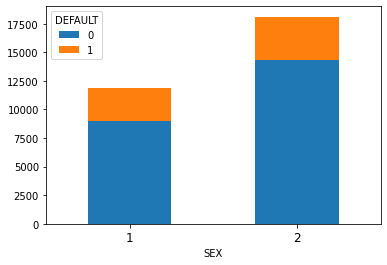

In [206]:
gender = df.groupby(['SEX', 'DEFAULT']).size().unstack(1)
gender.plot(kind='bar', stacked = True)
plt.xticks(fontsize=12, rotation=0)


In [207]:
# get percentage of defaulters
df.groupby(['SEX', 'DEFAULT']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


SEX  DEFAULT
1    0          75.832773
     1          24.167227
2    0          79.223719
     1          20.776281
dtype: float64

- We can see that there is a marginally higher percentage of males who default than females who default. Thus, the input variable "SEX" may be an useful input attribute.

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

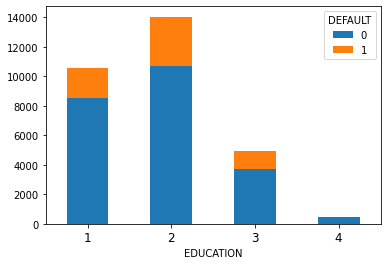

In [208]:
education = df.groupby(['EDUCATION', 'DEFAULT']).size().unstack(1)
education.plot(kind='bar', stacked = True)
plt.xticks(fontsize=12, rotation=0)

In [209]:
# get percentage of defaulters
df.groupby(['EDUCATION', 'DEFAULT']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

EDUCATION  DEFAULT
1          0          80.765234
           1          19.234766
2          0          76.265146
           1          23.734854
3          0          74.842384
           1          25.157616
4          0          92.948718
           1           7.051282
dtype: float64

- We can see that there is a higher percentage of people in high school defaulting as compared to university and graduate school. The 'EDUCATION' attribute could be an useful input attribute for our model.

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

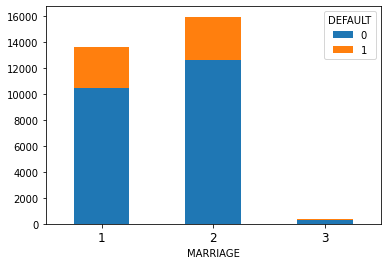

In [210]:
marriage = df.groupby(['MARRIAGE', 'DEFAULT']).size().unstack(1)
marriage.plot(kind='bar', stacked = True)
plt.xticks(fontsize=12, rotation=0)

In [211]:
# get percentage of defaulters
df.groupby(['MARRIAGE', 'DEFAULT']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

MARRIAGE  DEFAULT
1         0          76.528296
          1          23.471704
2         0          79.071661
          1          20.928339
3         0          76.392573
          1          23.607427
dtype: float64

- We can see that there is a higher percenatge of defaulters in the married and others category, compared to the single category. Thus, the marriage variable can be amn useful input attribute. 

## Handling Age variable (Data Encoding)

<AxesSubplot:xlabel='DEFAULT', ylabel='AGE'>

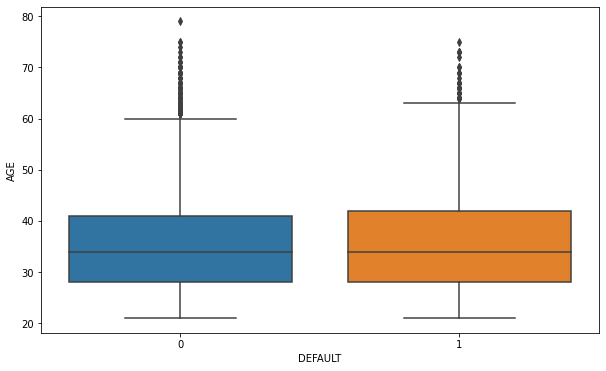

In [212]:
# plot boxplot for age by default
plt.figure(figsize=(10,6))  
sns.boxplot(x='DEFAULT', y='AGE', data=df)

- As we can see, if we were to just leave the age variable as it is, the age input attribute will be as good as useless since the distribution of age for default and non-default is about the same.
- Hence, we will attempt to use Data Encoding on Age variable to see if Age can be useful.
- Minimum age is 21, maximum age is 79.
- Based on statistics in Singapore, we have decided to split the age groups as [21, 30], [31, 40], [41, 54], [55, 80]. 21-30 years old are young graduates who just joined the workforce and may need money to fund expenses. 31-40 are working adults who are more mature and have a more stable income. 41-54 are individuals who worked for very long and should hold a stable income. Aged 55 and above are either retired individuals or those who need a lot of money to fund their lifestyle after retiring.

In [213]:
# adding a new column to the dataframe to categorize age
bins = [20, 30, 40, 54, 80]
bins_names = [1, 2, 3, 4]
df['AGE_BIN'] = pd.cut(df['AGE'], bins, labels=bins_names)

# do for train and test also
train_df['AGE_BIN'] = pd.cut(train_df['AGE'], bins, labels=bins_names)
test_df['AGE_BIN'] = pd.cut(test_df['AGE'], bins, labels=bins_names)


In [214]:
# proportion of age
df.AGE_BIN.value_counts()

1    11013
2    10713
3     7221
4     1053
Name: AGE_BIN, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

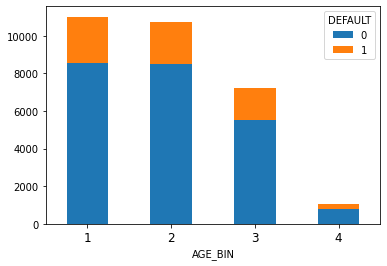

In [215]:
# plot stacked barchart for age
age = df.groupby(['AGE_BIN', 'DEFAULT']).size().unstack(1)
age.plot(kind='bar', stacked = True)
plt.xticks(fontsize=12, rotation=0)


In [216]:
# get percentage of defaulters
df.groupby(['AGE_BIN', 'DEFAULT']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

AGE_BIN  DEFAULT
1        0          77.562880
         1          22.437120
2        0          79.566881
         1          20.433119
3        0          76.526797
         1          23.473203
4        0          73.314340
         1          26.685660
dtype: float64

- From the statistic, we can see that those above 55 are more likely to default. Thus, age can be an useful input attribute for our model.

## Compress the columns using PCA and make a 3D plot

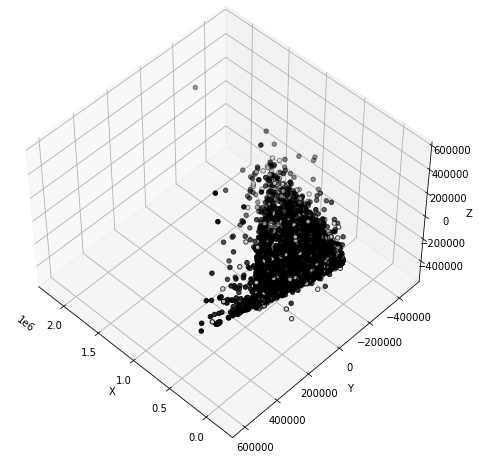

In [217]:
# PCA 3D plot of all the variables

pca = PCA(n_components=3)
pca.fit(df)
X = pca.transform(df)
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Put more colors for more clusters
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=df['DEFAULT'], cmap=plt.cm.nipy_spectral,
              edgecolor='k')
    
plt.show()


## T-SNE plot to see if the target is separable

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.009s...
[t-SNE] Computed neighbors for 30000 samples in 0.510s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

<AxesSubplot:>

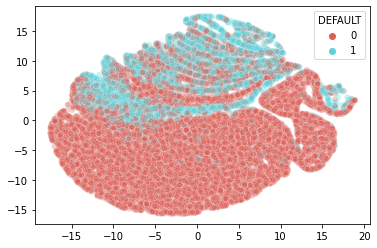

In [218]:
# t-sne plot
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, init='pca', learning_rate='auto')
tsne_results = tsne.fit_transform(principalDf)

sns.scatterplot (
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=df['DEFAULT'],
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3

)

T-SNE helps us to reduce the dimensionality and visualise the high-dimensional data set. From the plot, we can see that there is no clear distinct cluster. This shows that the target value in the dataset is not linearly separable. 

Knowing that the target is not linearly separable, we are able to better pick the model and parameter to best predict our target value. 


# Model before feature selection and before taking into account the imbalance of the data

We use MinMaxScaler() to transform the data into values between 0 and 1. This is because input variables in different magnitudes will contribute differently to feature selection and fitting of model and this will lead to bias when numbers of larger magnitude gets “prioritised”. MinMaxScaler() serves to deal with such a potential problem.

MinMaxScalar subtracts the minimum value in the feature and divides it by the range. This can preserve the shape of the original distribution without changing the information embedded in the data. 

This will allow the machine learning algorithm to work better and converge faster as the features are transformed to a relatively similar scale and close to Normal Distribution. 


## MinMaxScaler

In [272]:
target = 'DEFAULT'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE_BIN', 
                'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
y = df[target]

x_train = train_df[predictors]
y_train = train_df[target]
x_test = test_df[predictors]
y_test = test_df[target] 

xtrain_scaler = MinMaxScaler().fit_transform(x_train)
xtest_scaler = MinMaxScaler().fit_transform(x_test)

In [220]:

# svm
# use 'rbf' as kernel
svc = SVC(kernel='rbf', C=1)
best_model = svc.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
svc_pred_mms = best_model.predict(xtest_scaler)    # Predicting the results

conf_metr = confusion_matrix(y_test, svc_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,svc_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, svc_pred_mms))
print("Average Class Accuracy: ", metrics.balanced_accuracy_score(y_test, svc_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, svc_pred_mms))
print("Precision:",metrics.precision_score(y_test, svc_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, svc_pred_mms))

Confusion Matrix: 
 [[5591  241]
 [1168  500]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5832
           1       0.67      0.30      0.42      1668

    accuracy                           0.81      7500
   macro avg       0.75      0.63      0.65      7500
weighted avg       0.79      0.81      0.78      7500

Accuracy: 0.8121333333333334
Average Class Accuracy:  0.6292182303539884
Recall/Sensitivity/True Positive Rate: 0.2997601918465228
Precision: 0.6747638326585695
F1 Score: 0.41511000415110005


In [221]:
# neural network
model = MLPClassifier(activation='relu', solver='adam', random_state=0, hidden_layer_sizes=(16,12,10), batch_size=200)
params={'alpha':[0.2, 0.205, 0.21, 0.215,0.22], 'max_iter':[220, 225, 230]}

gsv = GridSearchCV(model, params , cv=5, n_jobs=-1, scoring = 'balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)
nn_pred_mms = best_model.best_estimator_.predict(xtest_scaler)

conf_metr = confusion_matrix(y_test, nn_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,nn_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, nn_pred_mms))
print("Average Class Accuracy: ", metrics.balanced_accuracy_score(y_test, nn_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, nn_pred_mms))
print("Precision:",metrics.precision_score(y_test, nn_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, nn_pred_mms))


Confusion Matrix: 
 [[5522  310]
 [1114  554]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5832
           1       0.64      0.33      0.44      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.64      0.66      7500
weighted avg       0.79      0.81      0.79      7500

Accuracy: 0.8101333333333334
Average Class Accuracy:  0.6394896428536183
Recall/Sensitivity/True Positive Rate: 0.33213429256594723
Precision: 0.6412037037037037
F1 Score: 0.43759873617693523


In [222]:
# KNN
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)

grid = dict(n_neighbors=n_neighbors)
gsv = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='balanced_accuracy',error_score=0)
best_model = gsv.fit(xtrain_scaler, y_train)
knn_pred = best_model.predict(xtest_scaler)

print("Best HyperParameter: ",gsv.best_params_)
conf_metr = metrics.confusion_matrix(y_test, knn_pred)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,knn_pred))
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))
print("Average Class Accuracy: ", metrics.balanced_accuracy_score(y_test, knn_pred))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, knn_pred))
print("Precision:",metrics.precision_score(y_test, knn_pred))
print("F1 Score:",metrics.f1_score(y_test, knn_pred))


Best HyperParameter:  {'n_neighbors': 7}
Confusion Matrix: 
 [[5473  359]
 [1155  513]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5832
           1       0.59      0.31      0.40      1668

    accuracy                           0.80      7500
   macro avg       0.71      0.62      0.64      7500
weighted avg       0.77      0.80      0.77      7500

Accuracy: 0.7981333333333334
Average Class Accuracy:  0.6229985147684322
Recall/Sensitivity/True Positive Rate: 0.30755395683453235
Precision: 0.588302752293578
F1 Score: 0.4039370078740157


In [273]:
# Logistic Regression
c_val = [0.1,0.5,1.0,2.0,3.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1, scoring = 'balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
logreg_pred_mms = best_model.best_estimator_.predict(xtest_scaler) # Predicting the results


conf_metr = confusion_matrix(y_test, logreg_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,logreg_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred_mms))
print("Average Class Accuracy: ", metrics.balanced_accuracy_score(y_test, logreg_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, logreg_pred_mms))
print("Precision:",metrics.precision_score(y_test, logreg_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, logreg_pred_mms))



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Confusion Matrix: 
 [[5616  216]
 [1234  434]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5832
           1       0.67      0.26      0.37      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.61      0.63      7500
weighted avg       0.79      0.81      0.77      7500

Accuracy: 0.8066666666666666
Average Class Accuracy:  0.6115774047428724
Recall/Sensitivity/True Positive Rate: 0.26019184652278177
Precision: 0.6676923076923077
F1 Score: 0.3744607420189819


In [224]:
# Random Forest
estimators = [10,50,80,100,150,200,250,300]

rf = RandomForestClassifier(max_depth=3,random_state=5)
hyperParam = [{'n_estimators':estimators}]

gsv = GridSearchCV(rf,hyperParam,cv=5,verbose=1, scoring = 'balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
rf_pred_mms = best_model.best_estimator_.predict(xtest_scaler)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [225]:
conf_metr = confusion_matrix(y_test, rf_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,rf_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred_mms))
print("Average Class Accuracy: ", metrics.balanced_accuracy_score(y_test, rf_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, rf_pred_mms))
print("Precision:",metrics.precision_score(y_test, rf_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, rf_pred_mms))

Confusion Matrix: 
 [[5607  225]
 [1247  421]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5832
           1       0.65      0.25      0.36      1668

    accuracy                           0.80      7500
   macro avg       0.73      0.61      0.62      7500
weighted avg       0.78      0.80      0.77      7500

Accuracy: 0.8037333333333333
Average Class Accuracy:  0.6069089173105959
Recall/Sensitivity/True Positive Rate: 0.25239808153477217
Precision: 0.651702786377709
F1 Score: 0.36387208297320656


In [226]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
estimators = [10,50,80,100,150,200,250,300]
hyperParam = [{'n_estimators':estimators}]
gsv = GridSearchCV(xgb,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                      
xgb_pred_mms = best_model.best_estimator_.predict(xtest_scaler)  

conf_metr = confusion_matrix(y_test, xgb_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,xgb_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, xgb_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, xgb_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, xgb_pred_mms))
print("Precision:",metrics.precision_score(y_test, xgb_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, xgb_pred_mms))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Confusion Matrix: 
 [[5480  352]
 [1056  612]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5832
           1       0.63      0.37      0.47      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.79      0.81      0.79      7500

Accuracy: 0.8122666666666667
Average Class Accuracy: 0.6532749109354492
Recall/Sensitivity/True Positive Rate: 0.3669064748201439
Precision: 0.6348547717842323
F1 Score: 0.46504559270516715


Before we do feature selection we observe some insights from the models 
  
- The accuracy is generally around 0.803 to 0.813, which is relatively high.
- However, accuracy can cover for poor performance of models when the data is imbalanced.
- The average class accuracy is relatively low due to the imbalance of the dataset.
- The recall is generally between 0.252 to 0.332, in terms of predicting default. This is considered very low.
  
We will see if there will be improvements after doing Feature Selection.


# Feature Selection
In feature selection, we utilise different methods to select those feature variables that contribute significantly to the target variable, and we forfeit the feature variables that have no relation with target variables.

In this section, we use the 
  
- Correlation plots to find the correlation of dependent variables with target variables
- Chi-2 Test to determine the independence of categorical variables with default payment
- Wrapper method such as Forward Selection, Backward Elimination to find the best combination of dependent variables that generate the best prediction model.
- Embedded method such as Lasso Regularisation to eliminate non-useful variable
  

## Filter Methods
### Plot correlation graph to get a general sensing of the variables that are impacting the target variable

<AxesSubplot:>

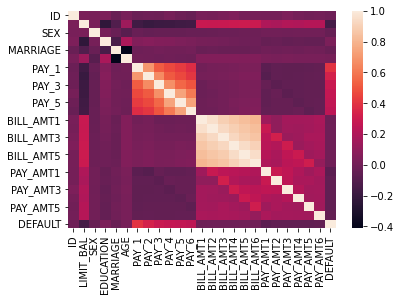

In [227]:
# correlation plot with all the variables
corr = df.corr()
sns.heatmap(corr)


From the plot, no useful information was extracted due to excessive information. 

We continue to analyse the correlation plot by parts.


<AxesSubplot:>

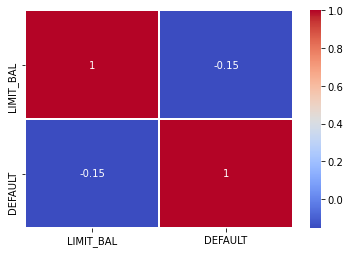

In [228]:
# correlation matrix limit_bal
corr = df[['LIMIT_BAL', 'DEFAULT']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)

In [229]:
# correlation matrix for pay variables
corr = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']].corr()

corr.style.background_gradient(cmap='coolwarm')

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
PAY_1,1.000000,0.698389,0.516970,0.460224,0.424473,0.373805,0.396019
PAY_2,0.698389,1.000000,0.663529,0.512773,0.462717,0.407086,0.327093
PAY_3,0.516970,0.663529,1.000000,0.678931,0.551430,0.492827,0.286999
PAY_4,0.460224,0.512773,0.678931,1.000000,0.745419,0.602875,0.269055
PAY_5,0.424473,0.462717,0.551430,0.745419,1.000000,0.740357,0.260850
PAY_6,0.373805,0.407086,0.492827,0.602875,0.740357,1.000000,0.244437
DEFAULT,0.396019,0.327093,0.286999,0.269055,0.260850,0.244437,1.000000


In [230]:
# correlation matrix for pay_amt
corr = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']].corr()
corr.style.background_gradient(cmap='coolwarm')

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
PAY_AMT1,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.072929
PAY_AMT2,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.058579
PAY_AMT3,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740,-0.056250
PAY_AMT4,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834,-0.056827
PAY_AMT5,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896,-0.055124
PAY_AMT6,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000,-0.053183
DEFAULT,-0.072929,-0.058579,-0.056250,-0.056827,-0.055124,-0.053183,1.000000


In [231]:
# correlation matrix for bill_amt
corr = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'DEFAULT']].corr()
corr.style.background_gradient(cmap='coolwarm')

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULT
BILL_AMT1,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,-0.019644
BILL_AMT2,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,-0.014193
BILL_AMT3,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,-0.014076
BILL_AMT4,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,-0.010156
BILL_AMT5,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,-0.006760
BILL_AMT6,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,-0.005372
DEFAULT,-0.019644,-0.014193,-0.014076,-0.010156,-0.006760,-0.005372,1.000000


- From these correlation matrix, we have a few findings. For instance, we know that we may not need to add all BILL_AMT in our model because BILL_AMT1 to BILL_AMT6 are all very strongly correlated to each other.
- Furthermore, we can see that the variable PAY has a low positive correlation with default. This is intuitively sound because the longer someone takes to pay their bill, the more likely they are going to default, as it may mean they have no money to pay. Hence, we can maybe use other feature selection techniques to find out which PAY variable to use in the model for best prediction of DEFAULT.
- Last but not least, we can see that PAY_AMT alone does not seem to be correlated to default amount. This makes some intuitive sense because how much someone paid for their bills may not tell much about their financial ability. For example, they may be paying a lot for 1 month, but that could be due to them not paying for the previous months and just trying to pay everything they own before bankruptcy for instance. Even so, they may not have enough to pay for their full bills and can still default.
- From these findings, we know that we may perhaps need to merge some variables together.
- For instance, 
    - LIMIT_BAL and BILL_AMT could be merged to see how much 
    - BILL_AMT and PAY_AMT can me merged together to give us a sense of how much they owe and how much was being paid.

In [232]:
df['billpercredit1'] = df['BILL_AMT1']/df['LIMIT_BAL'] 
df['billpercredit2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['billpercredit3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['billpercredit4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['billpercredit5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['billpercredit6'] = df['BILL_AMT6']/df['LIMIT_BAL']

train_df['billpercredit1'] = train_df['BILL_AMT1']/train_df['LIMIT_BAL']
train_df['billpercredit2'] = train_df['BILL_AMT2']/train_df['LIMIT_BAL']
train_df['billpercredit3'] = train_df['BILL_AMT3']/train_df['LIMIT_BAL']
train_df['billpercredit4'] = train_df['BILL_AMT4']/train_df['LIMIT_BAL']
train_df['billpercredit5'] = train_df['BILL_AMT5']/train_df['LIMIT_BAL']
train_df['billpercredit6'] = train_df['BILL_AMT6']/train_df['LIMIT_BAL']

test_df['billpercredit1'] = test_df['BILL_AMT1']/test_df['LIMIT_BAL']
test_df['billpercredit2'] = test_df['BILL_AMT2']/test_df['LIMIT_BAL']
test_df['billpercredit3'] = test_df['BILL_AMT3']/test_df['LIMIT_BAL']
test_df['billpercredit4'] = test_df['BILL_AMT4']/test_df['LIMIT_BAL']
test_df['billpercredit5'] = test_df['BILL_AMT5']/test_df['LIMIT_BAL']
test_df['billpercredit6'] = test_df['BILL_AMT6']/test_df['LIMIT_BAL']

#correlation matric of bill per credit
corr = df[['billpercredit1','billpercredit2', 'billpercredit3', 'billpercredit4', 'billpercredit5', 'billpercredit6', 'DEFAULT']].corr()
corr.style.background_gradient(cmap='coolwarm')

,billpercredit1,billpercredit2,billpercredit3,billpercredit4,billpercredit5,billpercredit6,DEFAULT
billpercredit1,1.000000,0.934032,0.862141,0.799921,0.741718,0.695778,0.086168
billpercredit2,0.934032,1.000000,0.907715,0.843031,0.780456,0.733054,0.099039
billpercredit3,0.862141,0.907715,1.000000,0.891452,0.824188,0.778303,0.103902
billpercredit4,0.799921,0.843031,0.891452,1.000000,0.905570,0.845750,0.115925
billpercredit5,0.741718,0.780456,0.824188,0.905570,1.000000,0.916978,0.119156
billpercredit6,0.695778,0.733054,0.778303,0.845750,0.916978,1.000000,0.123373
DEFAULT,0.086168,0.099039,0.103902,0.115925,0.119156,0.123373,1.000000


- Using bill per credit may be a more useful input attribute rather than just BILL_AMT
- We can test further using other methods like Forward Backward Regression and Embedded Methods like Regularisation.

### Chi-Square Test for categorical variables
- H0: There is no relationship between the categorical variables and DEFAULT
- H1: There is a relationship between the categorical variables DEFAULT 

In this dataset, we have decided to perform a Chi-Square Test on commonly known categorical variables such as SEX, EDUCATION, MARRIAGE, to test whether there is a relationship between these variables and DEFAULT, and decide whether or not these variables may be a useful input attribute in the model to predict default.

In [233]:
from scipy.stats import chi2_contingency

# Test Chi-Square Independence for gender and default
X = df['SEX']
y = df['DEFAULT']
table = pd.crosstab(X,y)
chi2_contingency(observed= table)


(47.70879689062111,
 4.944678999412044e-12,
 1,
 array([[ 9258.3744,  2629.6256],
        [14105.6256,  4006.3744]]))

- p-value is 4.9446e-12

In [234]:
# Test Chi-Square Independence for marriage and default
X = df['MARRIAGE']
y = df['DEFAULT']
table = pd.crosstab(X,y)
chi2_contingency(observed= table)

(28.13032464482199,
 7.790720364202813e-07,
 2,
 array([[10637.6292,  3021.3708],
        [12432.7632,  3531.2368],
        [  293.6076,    83.3924]]))

- p-value is 7.7907e-07

In [235]:
# Test Chi-Square Independence for education and default
X = df['EDUCATION']
y = df['DEFAULT']
table = pd.crosstab(X,y)
chi2_contingency(observed= table)

(160.40995107224546,
 1.4950645648106153e-34,
 3,
 array([[ 8243.598 ,  2341.402 ],
        [10926.564 ,  3103.436 ],
        [ 3829.3596,  1087.6404],
        [  364.4784,   103.5216]]))

- p-value is 1.4950e-34

In [236]:
from scipy.stats import chi2_contingency

# Test Chi-Square Independence for gender and default
X = df['AGE_BIN']
y = df['DEFAULT']
table = pd.crosstab(X,y)
chi2_contingency(observed= table)

(38.755865643851806,
 1.9551529244512022e-08,
 3,
 array([[8576.9244, 2436.0756],
        [8343.2844, 2369.7156],
        [5623.7148, 1597.2852],
        [ 820.0764,  232.9236]]))

- p-value is 1.95515e-08

- From the Chi-Square Test, at the 5% level of significance, we are able to reject the null hypothesis that there is no relationship between the categorical variables and DEFAULT. Hence, we can add these 4 categorical variables into our next steps of feature selection including Forward Backward regression and Regularisation.

## Wrapper Method
- Wrapper methods evaluate multiple models using procedures that add and/or remove predictors to find the optimal combination that maximizes model performance. Examples include Forward Selection, Backward Elimination, Stepwise selection.

### Forward Selection

In [237]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Forward Regression
target = 'DEFAULT'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE_BIN', 
                'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'billpercredit1', 'billpercredit2', 'billpercredit3', 'billpercredit4', 'billpercredit5', 'billpercredit6']
x = df[predictors]
y = df[target]

sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 5)
#Use SFS to select the top 5 features 
sfs.fit(x, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).T
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(5,)","[0.11540273444382354, 0.1269922858904763, 0.18...",0.154612,"(PAY_1,)"
2,"(5, 10)","[0.12139540557848905, 0.1408423861249124, 0.19...",0.165433,"(PAY_1, PAY_6)"
3,"(0, 5, 10)","[0.123830783256349, 0.14410363090163247, 0.206...",0.171206,"(LIMIT_BAL, PAY_1, PAY_6)"
4,"(0, 5, 7, 10)","[0.12680785812408601, 0.1468074689515605, 0.20...",0.174119,"(LIMIT_BAL, PAY_1, PAY_3, PAY_6)"
5,"(0, 3, 5, 7, 10)","[0.12870963309267314, 0.1479584634615232, 0.20...",0.175167,"(LIMIT_BAL, MARRIAGE, PAY_1, PAY_3, PAY_6)"


### Backward Elimination

In [238]:
### Backward Elimination
from sklearn.feature_selection import RFE

model = LinearRegression()
#Define RFE 
rfe = RFE(model, n_features_to_select = 5)
#Use RFE to select the top 5 features 
fit = rfe.fit(x,y)

#Create a dataframe for the results 
df_RFE_results = []
for i in range(x.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': predictors[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,LIMIT_BAL,False,16
1,SEX,False,6
2,EDUCATION,False,12
3,MARRIAGE,False,5
4,AGE_BIN,False,10
5,PAY_1,True,1
6,PAY_2,False,8
7,PAY_3,True,1
8,PAY_4,False,9


## Embedded Method

### Lasso Regularisation (L1)

- We decided to use L1 Regularisation instead of L2 Regularisation because we know that L1 Regularisation has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model. We used L1 since we know that there are some features that will be useless in our model. 

In [239]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver = 'liblinear'))
sel_.fit(x, y)
sel_.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [240]:
# print the names of features that are selected
selected_feat= x.columns[(sel_.get_support())]
selected_feat


Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_BIN', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'billpercredit1',
       'billpercredit2', 'billpercredit3', 'billpercredit4', 'billpercredit5',
       'billpercredit6'],
      dtype='object')

- From the Forward Regression, the top 5 features to select are LIMIT_BAL, MARRIAGE, PAY_1, PAY_3, PAY_6.
- From the Backward Elimination (Recursive Feature Elimination), the top 5 features are PAY_1, PAY_3, PAY_6, billpercredit2, billpercredit6.
- From the Lasso Regularisation, we know that the important features are SEX, EDUCATION, MARRIAGE, AGE_BIN, PAY_1 TO PAY_6, and billpercredit1 to billpercredit6.
- From these feature selection techniques, we know that the potential features we are adding into the model will be LIMIT_BAL, MARRIAGE, PAY_1, PAY_3, PAY_6, billpercredit2, billpercredit6, and the categorical variables of EDUCATION that generated a very low p-value in the Chi-Square Test.

# Model After Feature Selection and before taking into account the imbalance of the data

After we selected the features, we will run all the models again and check the evaluation scores again. 

This help to give us a rough understanding if we need to further manipulate the training dataset to better predict on the test dataset


In [241]:
predictor_to_use = ['LIMIT_BAL', 'MARRIAGE', 'EDUCATION', 'PAY_1',  'PAY_3', 'PAY_6', 'billpercredit2', 'billpercredit6']
y = df[target]

x_train = train_df[predictor_to_use]
y_train = train_df[target]
x_test = test_df[predictor_to_use]
y_test = test_df[target]

xtrain_scaler = MinMaxScaler().fit_transform(x_train)
xtest_scaler = MinMaxScaler().fit_transform(x_test)

In [242]:
# svm
# use 'rbf' as kernel
svc = SVC(kernel='rbf', C=1)
best_model = svc.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
svc_pred_mms = best_model.predict(xtest_scaler)    # Predicting the results

conf_metr = confusion_matrix(y_test, svc_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,svc_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, svc_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, svc_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, svc_pred_mms))
print("Precision:",metrics.precision_score(y_test, svc_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, svc_pred_mms))

Confusion Matrix: 
 [[5578  254]
 [1147  521]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5832
           1       0.67      0.31      0.43      1668

    accuracy                           0.81      7500
   macro avg       0.75      0.63      0.66      7500
weighted avg       0.79      0.81      0.79      7500

Accuracy: 0.8132
Average Class Accuracy: 0.6343986539163731
Recall/Sensitivity/True Positive Rate: 0.31235011990407674
Precision: 0.672258064516129
F1 Score: 0.4265247646336472


In [243]:
# neural network
model = MLPClassifier(activation='relu', solver='adam', random_state=0, hidden_layer_sizes=(16,12,10), batch_size=200)
params={'alpha':[0.2, 0.205, 0.21, 0.215,0.22], 'max_iter':[220, 225, 230]}

gsv = GridSearchCV(model, params , cv=5, n_jobs=-1, scoring='balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)
nn_pred_mms = best_model.best_estimator_.predict(xtest_scaler)

conf_metr = confusion_matrix(y_test, nn_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,nn_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, nn_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, nn_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, nn_pred_mms))
print("Precision:",metrics.precision_score(y_test, nn_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, nn_pred_mms))


Confusion Matrix: 
 [[5550  282]
 [1139  529]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5832
           1       0.65      0.32      0.43      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.63      0.66      7500
weighted avg       0.79      0.81      0.78      7500

Accuracy: 0.8105333333333333
Average Class Accuracy: 0.6343961867543002
Recall/Sensitivity/True Positive Rate: 0.31714628297362113
Precision: 0.6522811344019729
F1 Score: 0.4267849939491731


In [244]:
# KNN
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)

grid = dict(n_neighbors=n_neighbors)
gsv = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='balanced_accuracy',error_score=0)
best_model = gsv.fit(xtrain_scaler, y_train)
knn_pred = best_model.predict(xtest_scaler)

print("Best HyperParameter: ",gsv.best_params_)
conf_metr = metrics.confusion_matrix(y_test, knn_pred)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,knn_pred))
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, knn_pred))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, knn_pred))
print("Precision:",metrics.precision_score(y_test, knn_pred))
print("F1 Score:",metrics.f1_score(y_test, knn_pred))


Best HyperParameter:  {'n_neighbors': 15}
Confusion Matrix: 
 [[5486  346]
 [1083  585]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5832
           1       0.63      0.35      0.45      1668

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

Accuracy: 0.8094666666666667
Average Class Accuracy: 0.6456957890477741
Recall/Sensitivity/True Positive Rate: 0.35071942446043164
Precision: 0.6283566058002148
F1 Score: 0.45017314351673715


In [245]:
# Logistic Regression
c_val = [0.1,0.5,1.0,2.0,3.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1, scoring='balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
logreg_pred_mms = best_model.best_estimator_.predict(xtest_scaler) # Predicting the results


conf_metr = confusion_matrix(y_test, logreg_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,logreg_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, logreg_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, logreg_pred_mms))
print("Precision:",metrics.precision_score(y_test, logreg_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, logreg_pred_mms))



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Confusion Matrix: 
 [[5584  248]
 [1180  488]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5832
           1       0.66      0.29      0.41      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.63      0.65      7500
weighted avg       0.79      0.81      0.78      7500

Accuracy: 0.8096
Average Class Accuracy: 0.6250209708776189
Recall/Sensitivity/True Positive Rate: 0.29256594724220625
Precision: 0.6630434782608695
F1 Score: 0.4059900166389351


In [246]:
# Random Forest
estimators = [10,50,80,100,150,200,250,300]

rf = RandomForestClassifier(max_depth=3,random_state=5)
hyperParam = [{'n_estimators':estimators}]

gsv = GridSearchCV(rf,hyperParam,cv=5,verbose=1, scoring='balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
rf_pred_mms = best_model.best_estimator_.predict(xtest_scaler)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [247]:

conf_metr = confusion_matrix(y_test, rf_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,rf_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, rf_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, rf_pred_mms))
print("Precision:",metrics.precision_score(y_test, rf_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, rf_pred_mms))

Confusion Matrix: 
 [[5588  244]
 [1156  512]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5832
           1       0.68      0.31      0.42      1668

    accuracy                           0.81      7500
   macro avg       0.75      0.63      0.66      7500
weighted avg       0.79      0.81      0.78      7500

Accuracy: 0.8133333333333334
Average Class Accuracy: 0.6325581510100562
Recall/Sensitivity/True Positive Rate: 0.3069544364508393
Precision: 0.6772486772486772
F1 Score: 0.4224422442244224


In [248]:
#xgboost
xgb = XGBClassifier()
estimators = [10,50,80,100,150,200,250,300]
hyperParam = [{'n_estimators':estimators}]
gsv = GridSearchCV(xgb,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                      
xgb_pred_mms = best_model.best_estimator_.predict(xtest_scaler)  

conf_metr = confusion_matrix(y_test, xgb_pred_mms)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,xgb_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, xgb_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, xgb_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, xgb_pred_mms))
print("Precision:",metrics.precision_score(y_test, xgb_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, xgb_pred_mms))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Confusion Matrix: 
 [[5496  336]
 [1133  535]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5832
           1       0.61      0.32      0.42      1668

    accuracy                           0.80      7500
   macro avg       0.72      0.63      0.65      7500
weighted avg       0.78      0.80      0.78      7500

Accuracy: 0.8041333333333334
Average Class Accuracy: 0.6315651182757498
Recall/Sensitivity/True Positive Rate: 0.3207434052757794
Precision: 0.6142365097588978
F1 Score: 0.4214257581725088


Before we do feature selection we observe some insights from the models 
  
- We can see that all the evaluation statistics have improved after feature selection. This means that the features we choose from the model indeed is able to improve our model
- However, we still have yet to solve the problem of an imbalanced dataset. Having an accuracy more than 80% may not be a reliable indicator of the matrix. If a model predicts all 0, then they are able to have 80% accuracy as well.
- Even though all the evaluation statistics have improved, we notice that the recall and average class accuracy is still relatively low, thus we will look to improve these after balancing the data.
  
To obtain a more reliable evaluation, we will balance the data and run the models again 


# Data Pre-processing part 2

In [249]:
predictor_to_use = ['LIMIT_BAL', 'MARRIAGE', 'EDUCATION', 'PAY_1',  'PAY_3', 'PAY_6', 'billpercredit2', 'billpercredit6']
y = df[target]

x_train = train_df[predictor_to_use]
y_train = train_df[target]
x_test = test_df[predictor_to_use]
y_test = test_df[target]


## Using SMOTE to deal with unbalanced target data

From the previous section, we found that there is an imbalance of data, the default and non-default roughly have an 8:2 ratio, which will cause misleading accuracy scores by our model. A model is able to predict up to 80% accuracy even if it predicts all “0”, thus SMOTE is used to balance the training dataset given.

In [250]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  

from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state = 2)
x_train = np.array(x_train)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 4968
Before OverSampling, counts of label '0': 17532 

After OverSampling, the shape of train_X: (35064, 8)
After OverSampling, the shape of train_y: (35064,) 

After OverSampling, counts of label '1': 17532
After OverSampling, counts of label '0': 17532


Plot the distribution of the target variable before and after SMOTE

<AxesSubplot:ylabel='count'>

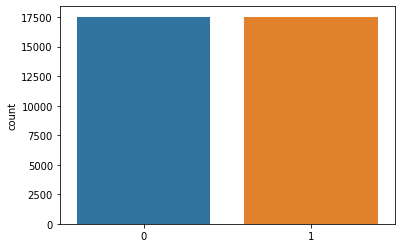

In [251]:
sns.countplot(y_train_res)

In [252]:
xtrain_scaler = MinMaxScaler().fit_transform(x_train_res)
y_train = y_train_res
xtest_scaler = MinMaxScaler().fit_transform(x_test)

## SVM (Support Vector Machine)

Tuned Model with transformed data:

In [253]:
kernels = ['rbf','linear','poly','sigmoid']

svc = SVC()
hyperParam = [{'kernel':kernels}]

gsv = GridSearchCV(svc,hyperParam,cv=5,verbose=1, scoring='balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
svc_pred_mms = best_model.best_estimator_.predict(xtest_scaler)    # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Average Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best HyperParameter:  {'kernel': 'rbf'}
Best Average Accuracy : 0.6846966870947686


The candidate HyperParameters selected are ‘rbf’, ‘linear’, ‘poly’ and ‘sigmoid’. Using GridSearchCV, the best HyperParameter found is ‘rbf’ (Gaussian Kernel Radial Basis Function). 

This makes sense in theory as rbf, or Radial Kernel is able to deal with overlapping data. It can find Support Vector Classifiers with infinite dimensions.


Confusion Matrix Tuned Model with transformed data:

Confusion Matrix: 
 [[4878  954]
 [ 779  889]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5832
           1       0.48      0.53      0.51      1668

    accuracy                           0.77      7500
   macro avg       0.67      0.68      0.68      7500
weighted avg       0.78      0.77      0.77      7500

Accuracy: 0.7689333333333334
Average Class Accuracy: 0.6846966870947686
Recall/Sensitivity/True Positive Rate: 0.5329736211031175
Precision: 0.48236570808464463
F1 Score: 0.5064084306465395


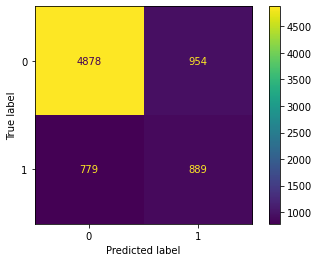

In [254]:

ConfusionMatrixDisplay.from_estimator(gsv, xtest_scaler, y_test)
conf_metr = confusion_matrix(y_test, svc_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,svc_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, svc_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, svc_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, svc_pred_mms))
print("Precision:",metrics.precision_score(y_test, svc_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, svc_pred_mms))

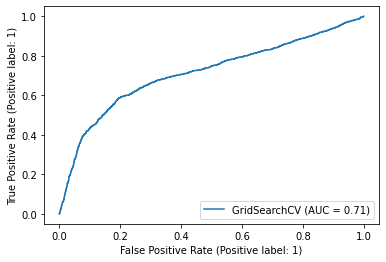

In [255]:
# ROC Curve:
RocCurveDisplay.from_estimator(gsv, xtest_scaler, y_test)

## MLP Classifier (Neural Network)

Tuning the model with transformed data:

In [256]:
#Fitting the model while tuning the best hyperparameters

model = MLPClassifier(activation='relu', solver='adam', random_state=0, hidden_layer_sizes=(16,12,10), batch_size=200)

params={'alpha':[0.2, 0.205, 0.21, 0.215,0.22], 'max_iter':[220, 225, 230]}

gsv = GridSearchCV(model, params , cv=5, n_jobs=-1, scoring='balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)
nn_pred_mms = best_model.best_estimator_.predict(xtest_scaler)

print("Best HyperParameter: ", gsv.best_params_)
print("Best Average Accuracy :", gsv.score(xtest_scaler, y_test))

Best HyperParameter:  {'alpha': 0.2, 'max_iter': 220}
Best Average Accuracy : 0.6900966880816335


The candidate parameters for penalty term alpha are 0.2, 0.205, 0.21, 0.215 and 0.22. Using GridSearchCV, the best penalty strength selected is 0.2. A relatively high alpha as compared to default 0.001 may solve the problem of high variance by encouraging smaller weights, so as the probability of overfitting is reduced.

The candidate maximum iterations is between 220, 225 and 230. Using GridSearchCV, the best maximum iterations is 220. This means that the solver will only iterate up to 220 times until convergence.

Confusion Matrix Tuned Model with transformed data:

Confusion Matrix: 
 [[4927  905]
 [ 775  893]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5832
           1       0.50      0.54      0.52      1668

    accuracy                           0.78      7500
   macro avg       0.68      0.69      0.68      7500
weighted avg       0.78      0.78      0.78      7500

Accuracy: 0.776
Average Class Accuracy: 0.6900966880816335
Recall/Sensitivity/True Positive Rate: 0.5353717026378897
Precision: 0.4966629588431591
F1 Score: 0.5152914021927294


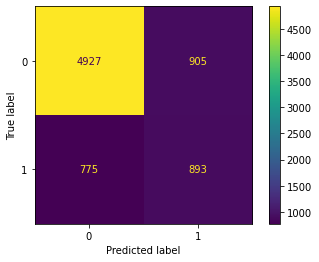

In [257]:
# Flip the confusion matrix so that TP is in the top left and TN is in the bottom right
ConfusionMatrixDisplay.from_estimator(gsv, xtest_scaler, y_test)
conf_metr = confusion_matrix(y_test, nn_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,nn_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, nn_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, nn_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, nn_pred_mms))
print("Precision:",metrics.precision_score(y_test, nn_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, nn_pred_mms))


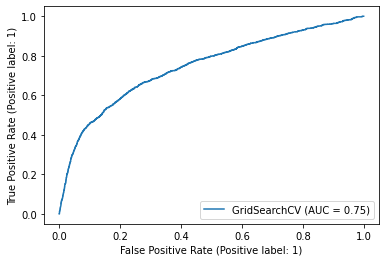

In [258]:
# ROC Curve:
RocCurveDisplay.from_estimator(gsv, xtest_scaler, y_test)

## KNN

Check for which K, model is generating more accuracy, using transformed train and test data

In [259]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gsv = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='balanced_accuracy',error_score=0)
best_model = gsv.fit(xtrain_scaler, y_train)
knn_pred = best_model.predict(xtest_scaler)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Average Accuracy :",best_model.score(xtest_scaler, y_test))

Best HyperParameter:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Average Accuracy : 0.6538318727733863


The candidate closest number of neighbours is ranged from 1 to 21. Using GridSearchCV, the best estimator number of neighbours selected is 7, which will produce the highest accuracy among all options.

The candidate distance metrics of finding the distance between neighbours are Euclidean Distance, Manhattan Distance, and Minkowski Distance. Using GridSearchCV, the best distance metrics is Manhattan Distance, which has a formula of |x_i - y_i| .


### Confusion Matrix of model with transformed data

Confusion Matrix: 
 [[4997  835]
 [ 916  752]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5832
           1       0.47      0.45      0.46      1668

    accuracy                           0.77      7500
   macro avg       0.66      0.65      0.66      7500
weighted avg       0.76      0.77      0.76      7500

Accuracy: 0.7665333333333333
Average Class Accuracy: 0.6538318727733863
Recall/Sensitivity/True Positive Rate: 0.45083932853717024
Precision: 0.47385003150598615
F1 Score: 0.46205837173579106


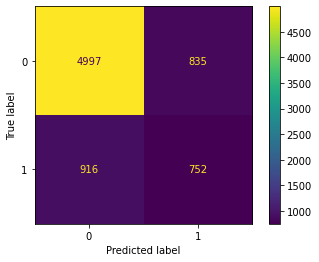

In [260]:
ConfusionMatrixDisplay.from_estimator(gsv, xtest_scaler, y_test)
conf_metr = metrics.confusion_matrix(y_test, knn_pred)
print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,knn_pred))
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, knn_pred))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, knn_pred))
print("Precision:",metrics.precision_score(y_test, knn_pred))
print("F1 Score:",metrics.f1_score(y_test, knn_pred))

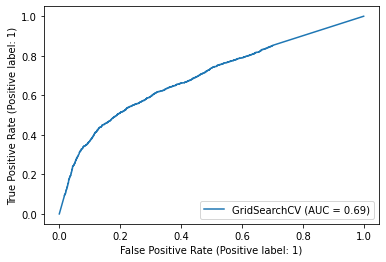

In [261]:
# ROC Curve:
RocCurveDisplay.from_estimator(gsv, xtest_scaler, y_test)

## Logistic Regression

HyperParamter Tuned model with transformed training and testing data

In [262]:
c_val = [0.1,0.5,1.0,2.0,3.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1, scoring='balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
logreg_pred_mms = best_model.best_estimator_.predict(xtest_scaler) # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Average Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 0.1}
Best Average Accuracy : 0.6886410624586751


The candidate C value – penalty strength selected are 0.1,0.5,1.0,2.0, and 3.0. Using GridSearchCV, the best penalty strength selected is 0.1. A low value of C tells the model to give lower weight to the training data, in order to prevent overfitting.


Confusion Matrix of model with transformed data

Confusion Matrix: 
 [[4931  901]
 [ 781  887]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      5832
           1       0.50      0.53      0.51      1668

    accuracy                           0.78      7500
   macro avg       0.68      0.69      0.68      7500
weighted avg       0.78      0.78      0.78      7500

Accuracy: 0.7757333333333334
Average Class Accuracy: 0.6886410624586751
Recall/Sensitivity/True Positive Rate: 0.5317745803357314
Precision: 0.4960850111856823
F1 Score: 0.5133101851851852


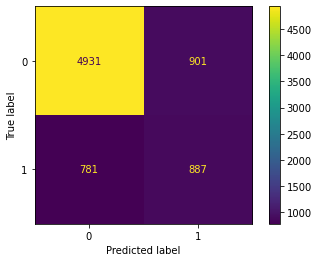

In [263]:

ConfusionMatrixDisplay.from_estimator(gsv,xtest_scaler, y_test)
conf_metr = confusion_matrix(y_test, logreg_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,logreg_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, logreg_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, logreg_pred_mms))
print("Precision:",metrics.precision_score(y_test, logreg_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, logreg_pred_mms))

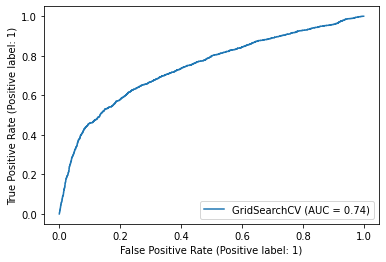

In [264]:
# ROC Curve:
RocCurveDisplay.from_estimator(gsv, xtest_scaler, y_test)

## Random Forest:

Hyperparameter Tuned Random Forest with transformed data:

In [265]:
estimators = [10,50,80,100,150,200,250,300]

rf = RandomForestClassifier(max_depth=3,random_state=5)
hyperParam = [{'n_estimators':estimators}]

gsv = GridSearchCV(rf,hyperParam,cv=5,verbose=1, scoring='balanced_accuracy')
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
rf_pred_mms = best_model.best_estimator_.predict(xtest_scaler)     # Predicting the results


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [266]:
print("Best HyperParameter: ",gsv.best_params_)
print("Best Average Accuracy :",best_model.score(xtest_scaler, y_test))

Best HyperParameter:  {'n_estimators': 50}
Best Average Accuracy : 0.6904248206373174


The candidate estimator sizes selected are 10,50,80,100,150,200,250, and 300. Using GridSearchCV, the best estimator size (number of trees in the random forest) selected is 50. 

Performance of Random Forest drastically increases when tree sizes increase from 10 to 50, and remains almost the same when tree sizes continue to increase. Hence, to prevent overfitting, we choose 50 as the estimator size.


Confusion Matrix of Hyperparameter Tuned Random Forest model with transformed data:

Confusion Matrix: 
 [[4763 1069]
 [ 727  941]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      5832
           1       0.47      0.56      0.51      1668

    accuracy                           0.76      7500
   macro avg       0.67      0.69      0.68      7500
weighted avg       0.78      0.76      0.77      7500

Accuracy: 0.7605333333333333
Average Class Accuracy: 0.6904248206373174
Recall/Sensitivity/True Positive Rate: 0.5641486810551559
Precision: 0.4681592039800995
F1 Score: 0.5116911364872214


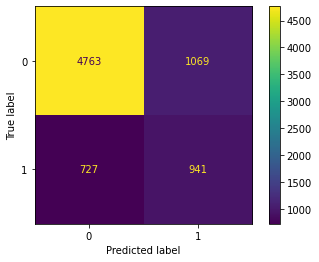

In [267]:
ConfusionMatrixDisplay.from_estimator(gsv, xtest_scaler, y_test)
conf_metr = confusion_matrix(y_test, rf_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,rf_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, rf_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, rf_pred_mms))
print("Precision:",metrics.precision_score(y_test, rf_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, rf_pred_mms))

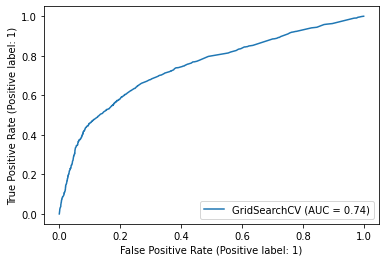

In [268]:
# ROC Curve:
RocCurveDisplay.from_estimator(gsv, xtest_scaler, y_test)

## XGBoost

Extra model that we tried is XGBoost, but due to the page limit, we will not be able to include the results here. However, we will include the code for XGBoost below.

In [269]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
estimators = [10,50,80,100,150,200,250,300]
hyperParam = [{'n_estimators':estimators}]
gsv = GridSearchCV(xgb,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                      
xgb_pred_mms = best_model.best_estimator_.predict(xtest_scaler)  

print("Best HyperParameter: ",gsv.best_params_)
print("Best Average Accuracy :",best_model.score(xtest_scaler, y_test))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 100}
Best Average Accuracy : 0.7752


Confusion Matrix: 
 [[5228  604]
 [1082  586]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5832
           1       0.49      0.35      0.41      1668

    accuracy                           0.78      7500
   macro avg       0.66      0.62      0.64      7500
weighted avg       0.75      0.78      0.76      7500

Accuracy: 0.7752
Average Class Accuracy: 0.6238762076758346
Recall/Sensitivity/True Positive Rate: 0.3513189448441247
Precision: 0.492436974789916
F1 Score: 0.4100769769069279


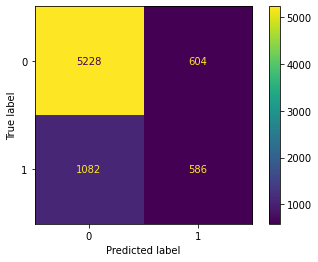

In [270]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(gsv, xtest_scaler, y_test)
conf_metr = confusion_matrix(y_test, xgb_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,xgb_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, xgb_pred_mms))
print("Average Class Accuracy:",metrics.balanced_accuracy_score(y_test, xgb_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, xgb_pred_mms))
print("Precision:",metrics.precision_score(y_test, xgb_pred_mms))
print("F1 Score:",metrics.f1_score(y_test, xgb_pred_mms))

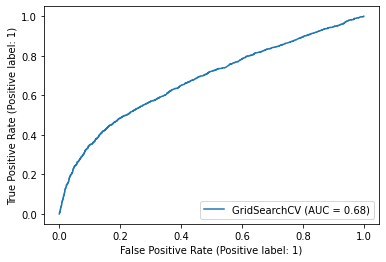

In [271]:
# ROC Curve:
RocCurveDisplay.from_estimator(gsv, xtest_scaler, y_test)


# Model Evaluation

Model Comparison
Best Models: MLP Classifier and Random Forest  
  
- These are the best models to predict for default and non default in terms of average class accuracy and F1 score. 
- These are the models that we want to consider using for default and non default payment
- MLP Classifier: It has the highest accuracy, F1 score and recall. It also have the second highest average class accuracy
- Random Forest: It has the highest average class accuracy. Even though it perform poorly for other metrics, since we are trying to find the model that have the best average class accuracy, we will consider random forest as one of the better models
- Potential Reason:
    - Both model are able to work with large datasets well
  
Worst Model: K – Nearest – Neighbour  
  
- This is the worst model to predict for default and non default  in terms of average class accuracy and F1 score. 
- This model perform the worse in terms of average class accuracy, F1 score and ROC. 
- Thus, we will not want to use this moel to predict for default and non default payments
- Potential Reasons:
    - Does not work well with the dataset as it is too huge
    - There are noise in the data or outlier which KNN is very sensitive to.
  